# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



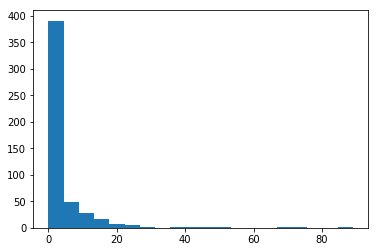

In [3]:
plt.hist(data['CRIM'], 20)
plt.show()

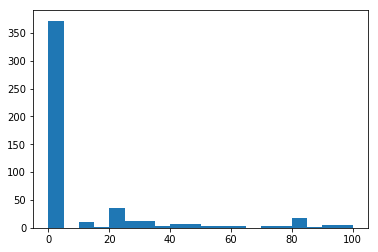

In [4]:
plt.hist(data['ZN'], 20)
plt.show()

В графике распределения по показателю ZN очень трудно распознать какой-либо известный тип распределения. Очень много нулевых значений. Но судя по определению, показатель ZN считается только для участков более 25 тыс кв.футов. То есть 0 может означать не нулевую долю жилого фонда на этом участке, а то, что участок менее 25 тыс кв футов.
Попробуем посмотреть на распределение ненулевых значений ZN

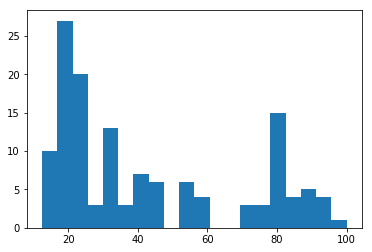

In [15]:
data_ZN=data[data['ZN']>0]
plt.hist(data_ZN['ZN'],20)
plt.show()

Все равно распределение очень неравномерное и непохожее ни на один из известных типов распределения

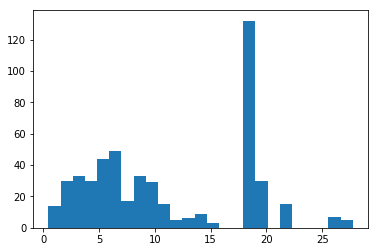

In [27]:
plt.hist(data['INDUS'], 25)
plt.show()

Группа от 1 до 16 имеет некоторую схожесть с нормальным распределением. Остальная часть, как и вся картина в целом, не вписывается ни в один из известных типов распределения

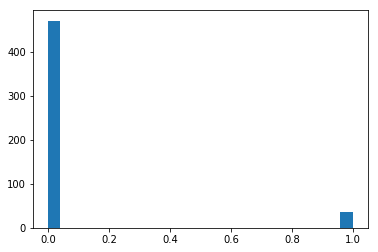

In [17]:
plt.hist(data['CHAS'], 25)
plt.show()

In [ ]:
Показатель CHAS имеет распределение Бернулли

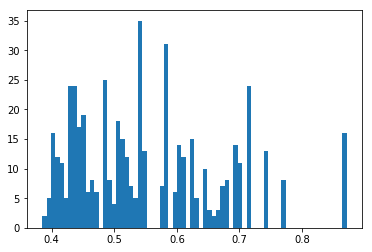

In [38]:
plt.hist(data['NOX'], 70)
plt.show()

По оксидам азота тоже очень хаотичное распределение. Однако, можно заметить, что хоть замеры и указаны с точностью до одной-тысячной, показатели представлены с некоторым шагом, т.е. похожи на дискретные. Этим можно объяснить множественные провалы на графике. Это также подтверждается тем, что если мы меняем шаг с 50 до 300 значений на оси Ох, то общая картина и значения по Оу почти не меняются. 
С большой натяжкой можно увидеть сходство с биноминальным распределением

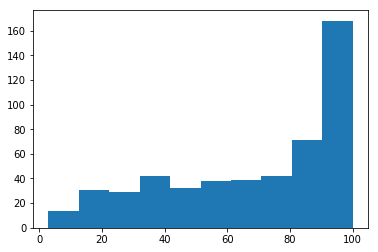

In [53]:
plt.hist(data['AGE'], 10)
plt.show()

Если укрупнить шаг по оси Ох до 10%, то можно разглядеть экспоненциальное распределение (только не с убыванием, а с возрастанием). График показывает преобладание районов с застройкой домами до 1940 года над районами с новой застройкой

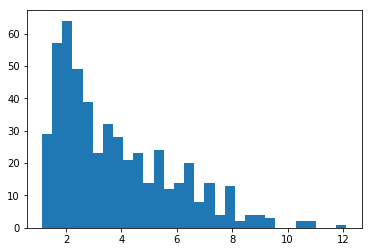

In [49]:
plt.hist(data['DIS'], 30)
plt.show()

Логнормальное распределение. График показывает преобладание застройки вблизи центров занятости

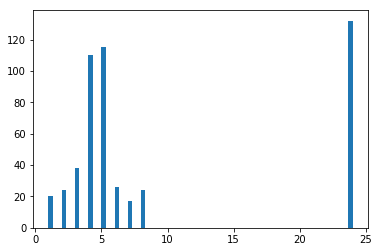

In [88]:
plt.hist(data['RAD'], 69)
plt.show()

Показатели индекса удаленности от основных магистралей являются дискретными значениями. В нашем случае явно прослеживаются две группы - от 2 до 8 и 24. Первая группа похожа на гипергеометрическое (Hyper-Geometric) распределение

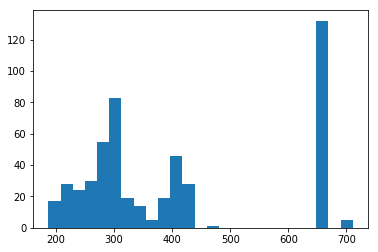

In [71]:
plt.hist(data['TAX'], 25)
plt.show()

Показатель уровня налога на 10000 долларов стоимости недвижимости также имеет очень хаотичное распределение. Снова видим две удаленные по значениям друг от друга группы - 180-480 долларов и 650-720 долларов.
Ни с одним известным типом распределения сходства не вижу

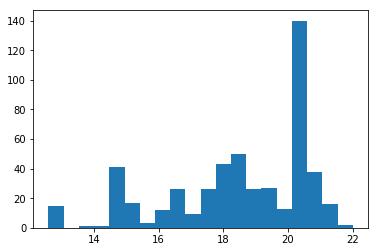

In [84]:
plt.hist(data['PTRATIO'], 20)
plt.show()

Распределение значений соотношения кол-ва учеников к кол-ву учителей довольно хаотично. Ни с одним известным типом распределения сходства не вижу

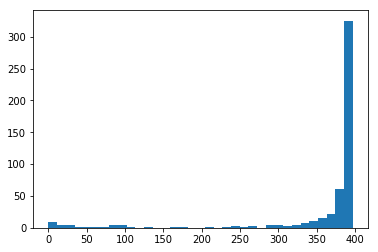

In [63]:
plt.hist(data['B'], 35)
plt.show()

На этом графике в диапазоне от 0 до 300 прослеживается в целом равномерное распределение (данных на этом диапазоне слишком мало). От 300 до 400 - возрастающее экспоненциальное распределение

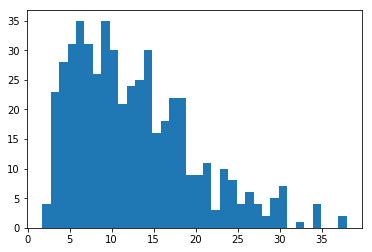

In [86]:
plt.hist(data['LSTAT'], 36)
plt.show()

Это распределение очень похоже на хи-квадратное (Chi-Squared)

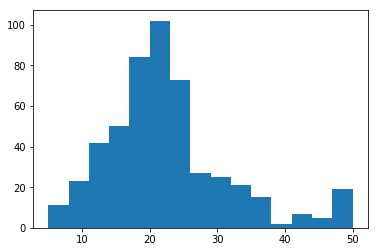

In [89]:
plt.hist(data['MEDV'], 15)
plt.show()

Это похоже на распределение Стьюдента

In [92]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [255]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data2=pd.read_csv(url)
#data2=pd.read_csv(url, names=['Country','Ladder','SD_of_ladder','Positive_affect','Negative_affect','Social_support','Freedom','Corruption','Generosity','Log_of_GDP_per_capita','Healthy_life_expectancy'])
data2.rename(columns={'Country (region)': 'Country', data2.columns[9]: 'Log_of_GDP_per_capita', data2.columns[10]: 'Healthy_life_expectancy'}, inplace=True)
#data2.rename(columns={'Log of GDP per capita': 'Log_of_GDP_per_capita', 'Healthy life expectancy': 'Healthy_life_expectancy'}, inplace=True)

data2.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log_of_GDP_per_capita,Healthy_life_expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Матрица ковариаций для значений Ladder и Freedom

In [233]:
"""Предварительно избавимся от строки с отсутствующим значением в столбце Свобода"""
data6=data2[data2['Country']!='Qatar']
data6=data6[[data6.columns[1],data6.columns[6]]]
data6.head(2)

,Ladder,Freedom
0,1,5.0
1,2,6.0


In [234]:
covar=np.cov(data6.T)
for i in range(2):
    for j in range(2):
        covar[i,j]=round(covar[i,j],2)
covar

array([[2038.24, 1108.09],
       [1108.09, 2015.  ]])

Матрица ковариаций для значений Ladder и Log_of_GDP_per_capita

In [245]:
data7=data2[data2['Log_of_GDP_per_capita'].isnull()!=True]
data7=data7[[data7.columns[1],data7.columns[9]]]
data7.head(2)

,Ladder,Log_of_GDP_per_capita
0,1,22.0
1,2,14.0


In [247]:
covar2=np.cov(data7.T)
for i in range(2):
    for j in range(2):
        covar2[i,j]=round(covar2[i,j],2)
covar2

array([[2034.31, 1615.  ],
       [1615.  , 1938.  ]])

In [248]:
"""Считаем отсутствующие значения в таблице"""
data2.isnull().sum().sum()

23

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [95]:
"""Считаем отсутствующие значения в столбце Страна """
data2['Country (region)'].isnull().sum()

0

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [96]:
"""Считаем количество стран в выборке"""
data2['Country (region)'].count()

156

Классифицировать страны по названию проблемно, так как каждое название уникально и мы просто получим 156 классов по 1 стране. Мне в первую очередь пришла идея классифицировать по географическому расположению (Европа, Азия, Африка и т.д). Хорошо, что в интернете есть почти готовые списки этих стран и можно их использовать в функции ранжирования стран по регионам

In [162]:
""" Эта функция разобьет страны на классы по территориальной принадлежности к географическому региону
"""
def region(row):
    Europe = ['Russia',
                 'Germany',
                 'Turkey',
                 'France',
                 'United Kingdom',
                 'Italy',
                 'Spain',
                 'Ukraine',
                 'Poland',
                 'Romania',
                 'Kazakhstan',
                 'Netherlands',
                 'Belgium',
                 'Greece',
                 'Czech Republic',
                 'Portugal',
                 'Sweden',
                 'Azerbaijan',
                 'Hungary',
                 'Belarus',
                 'Austria',
                 'Switzerland',
                 'Bulgaria',
                 'Serbia',
                 'Denmark',
                 'Finland',
                 'Slovakia',
                 'Norway',
                 'Ireland',
                 'Croatia',
                 'Georgia',
                 'Moldova',
                 'Bosnia and Herzegovina ',
                 'Armenia',
                 'Albania',
                 'Lithuania',
                 'Macedonia',
                 'Slovenia',
                 'Latvia',
                 'Kosovo',
                 'Estonia',
                 'Cyprus',
                 'Montenegro',
                 'Luxembourg',
                 'Malta',
                 'Iceland',
                 'Jersey',
                 'Isle of Man (UK)',
                 'Andorra',
                 'Guernsey (UK)',
                 'Faroe Islands (Denmark)',
                 'Monaco',
                 'Liechtenstein',
                 'Gibraltar (UK)',
                 'San Marino',
                 'Åland Islands (Finland)',
                 'Vatican City',
                 'Northern Cyprus']
    Africa=['Algeria',
                 'Angola',
                 'Benin',
                 'Botswana',
                 'Burkina Faso',
                 'Burundi',
                 'Cameroon',
                 'Cape Verde',
                 'Central African Republic',
                 'Chad',
                 'Comoros',
                 'Democratic Republic of the Congo',
                 'Djibouti',
                 'Egypt',
                 'Equatorial Guinea',
                 'Eritrea',
                 'Eswatini',
                 'Swaziland',
                 'Ethiopia',
                 'Gabon',
                 'Gambia',
                 'Ghana',
                 'Guinea',
                 'Guinea-Bissau',
                 'Ivory Coast',
                 'Kenya',
                 'Lesotho',
                 'Liberia',
                 'Libya',
                 'Madagascar',
                 'Malawi',
                 'Mali',
                 'Mauritania',
                 'Mauritius',
                 'Mayotte (France)',
                 'Morocco',
                 'Mozambique',
                 'Namibia',
                 'Niger',
                 'Nigeria',
                 'Republic of the Congo',
                 'Rwanda',
                 'Réunion (France)',
                 'Saint Helena, Ascension and Tristan da Cunha (UK)',
                 'Senegal',
                 'Seychelles',
                 'Sierra Leone',
                 'Somalia',
                 'South Africa',
                 'South Sudan',
                 'Sudan',
                 'São Tomé and Príncipe',
                 'Tanzania',
                 'Togo',
                 'Tunisia',
                 'Uganda',
                 'Western Sahara',
                 'Zambia',
                 'Zimbabwe',
                 'Congo (Brazzaville)',
                 'Congo (Kinshasa)']
    Asia=['Afghanistan',
                 'Armenia',
                 'Azerbaijan',
                 'Bahrain',
                 'Bangladesh',
                 'Bhutan',
                 'Brunei',
                 'Myanmar',
                 'Cambodia',
                 'China',
                 'Georgia',
                 'Hong Kong',
                 'India',
                 'Indonesia',
                 'Iran',
                 'Iraq',
                 'Israel',
                 'Japan',
                 'Jordan',
                 'Kazakhstan',
                 'North Korea',
                 'South Korea',
                 'Kuwait',
                 'Kyrgyzstan',
                 'Laos',
                 'Lebanon',
                 'Macau',
                 'Malaysia',
                 'Maldives',
                 'Mongolia',
                 'Nepal',
                 'Oman',
                 'Pakistan',
                 'Philippines',
                 'Qatar',
                 'Saudi Arabia',
                 'Singapore',
                 'Sri Lanka',
                 'Syria',
                 'Taiwan',
                 'Tajikistan',
                 'Thailand',
                 'Timor-Leste',
                 'Turkmenistan',
                 'United Arab Emirates',
                 'Uzbekistan',
                 'Vietnam',
                 'Yemen',
                 'Palestinian Territories']
    Oceania=[    'Australia',
                 'Papua New Guinea',
                 'New Zealand',
                 'Fiji',
                 'Solomon Islands',
                 'Vanuatu',
                 'New Caledonia (France)',
                 'French Polynesia (France)',
                 'Samoa',
                 'Guam (US)',
                 'Kiribati',
                 'Federated States of Micronesia',
                 'Tonga',
                 'American Samoa (US)',
                 'Northern Mariana Islands (US)',
                 'Marshall Islands',
                 'Palau',
                 'Cook Islands (NZ)',
                 'Wallis and Futuna (France)',
                 'Tuvalu',
                 'Nauru',
                 'Norfolk Island (Australia)',
                 'Niue (NZ)',
                 'Tokelau (NZ)',
                 'Pitcairn Islands (UK)']
    N_America=['United States',
                 'Mexico',
                 'Canada',
                 'Guatemala',
                 'Cuba',
                 'Haiti',
                 'Dominican Republic',
                 'Honduras',
                 'El Salvador',
                 'Nicaragua',
                 'Costa Rica',
                 'Panama',
                 'Puerto Rico (US)',
                 'Jamaica',
                 'Trinidad and Tobago',
                 'Guadeloupe (France)',
                 'Martinique (France)',
                 'Bahamas',
                 'Belize',
                 'Barbados',
                 'Saint Lucia',
                 'Saint Vincent and the Grenadines',
                 'United States Virgin Islands (US)',
                 'Grenada',
                 'Antigua and Barbuda',
                 'Dominica',
                 'Bermuda (UK)',
                 'Cayman Islands (UK)',
                 'Greenland\xa0(Denmark)',
                 'Saint Kitts and Nevis',
                 'Sint Maarten (Kingdom of the Netherlands)',
                 'Turks and Caicos Islands (UK)',
                 'Saint Martin (France)',
                 'British Virgin Islands (UK)',
                 'Caribbean Netherlands (Kingdom of the Netherlands)',
                 'Anguilla (UK)',
                 'Saint Barthélemy (France)',
                 'Saint Pierre and Miquelon (France)',
                 'Montserrat (UK)']
    S_America=['Brazil',
                 'Colombia',
                 'Argentina',
                 'Peru',
                 'Venezuela',
                 'Chile',
                 'Ecuador',
                 'Bolivia',
                 'Paraguay',
                 'Uruguay',
                 'Guyana',
                 'Suriname',
                 'French Guiana (France)',
                 'Falkland Islands (UK)']
    if row['Country'] in Europe:
        return 'Europe'
    elif row['Country'] in Africa:
        return 'Africa'
    elif row['Country'] in Asia:
        return 'Asia'   
    elif row['Country'] in Oceania:
        return 'Oceania' 
    elif row['Country'] in N_America:
        return 'N_America' 
    elif row['Country'] in S_America:
        return 'S_America'     
    else:
        return 'None'

In [199]:
data3=data2
data3['region']=data2.apply(region, axis=1)

In [200]:
data3.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log_of_GDP_per_capita,Healthy_life_expectancy,region
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe


Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

Поскольку столбцов в таблице очень много и пэйрплот будет неинформативным, сокращу кол-во столбцов перед построением графика.


In [201]:
data4=data3[['Ladder', 'Corruption', 'Freedom', 'region']]

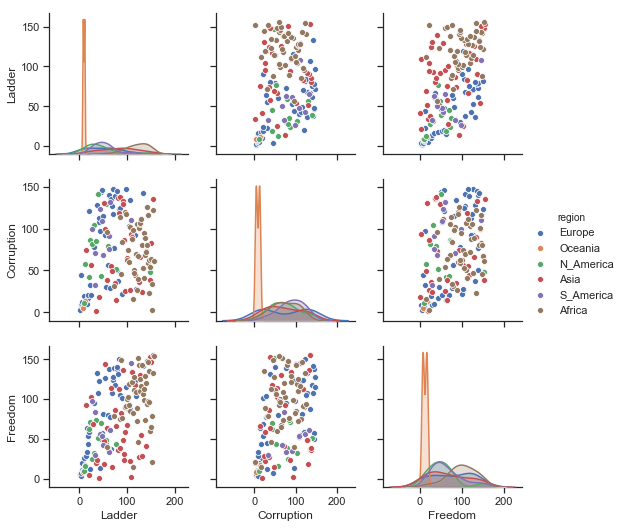

In [202]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data4, hue='region')
plt.show()

По всем исследуемым параметрам видим, что на графиках распределения страны Океании образуют заметные пики. Это говорит о том, что всем параметрам (уровень счастья, коррупции и свободы) эти страны находятся очень близко друг к другу. А близость к оси Оу говорит о благополучии этих стран по всем исследуемым параметрам. В остальных регионах нет такой схожести, разброс значений шире.
Можно также увидеть, что африканские страны на всех графиках, где есть уровень счастья (Ladder) смещены в сторону высоких значений (то есть эти страны преимущественно находятся внизу рейтинга). На графиках распределения уровня счастья и свободы также видно, что африканская "горка" смещена вправо, что так же говорит об отсталости этих стран в общем рейтинге.
Также видно преобладание европейских и североамериканских стран в верхней части рейтинга счастья
Коррупция, как показывают графики, живет во всех регионах за исключением Океании.

В целом исследуемые параметры не имеют сильной корреляции с уровнем счастья


Отдельно рассмотрим пэйрплот для показателей ВВП на душу населения и продолжительности жизни

In [205]:
data5=data3[['region','Ladder', "Log_of_GDP_per_capita","Healthy_life_expectancy"]]

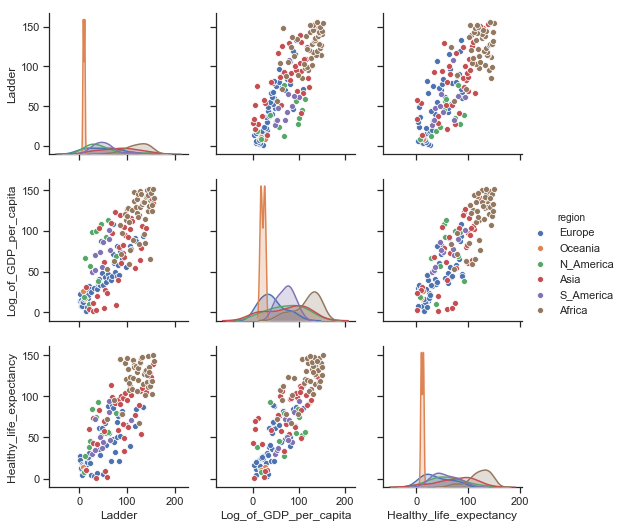

In [206]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data5, hue='region')
plt.show()

Здесь мы видим, что точечные графики имеют характерный наклон вправо. Это указывает на зависимость этих показателей на уровень счастья (т.е. чем выше уровень ВВП и продолжительность жизни в стране, тем счастливее ее жители)
Также видим отсталость африканских стран и преуспевание европейских, североамериканских, а также стран Океании.

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

Собственное значение:  1017.6 Собственный вектор:  [-0.71116669  0.70302343]


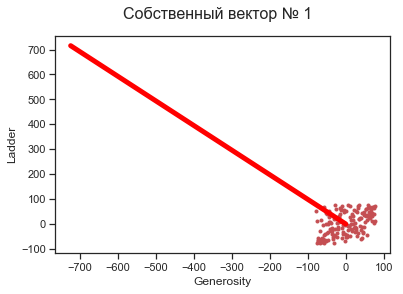

Собственное значение:  3035.63 Собственный вектор:  [-0.70302343 -0.71116669]


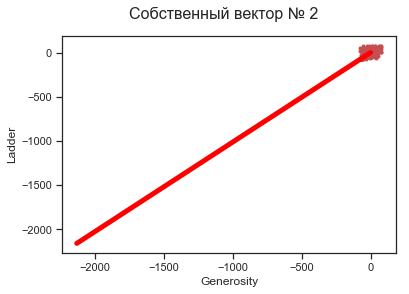

In [362]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

data8=data2[data2['Generosity'].isnull()!=True]

Generosity = data8['Generosity']
Ladder = data8['Ladder']
mean1 = statistics.mean(Generosity)
Generosity -= mean1
mean2 = statistics.mean(Ladder)
Ladder -= mean2
Y = np.vstack((Generosity, Ladder)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(Generosity, Ladder, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Generosity')
    plt.ylabel('Ladder')
    plt.plot([0, 0+w[i]*v[:,i][0]], [0, 0 +w[i] * v[:,i][1]],color='red', linewidth=5)
    plt.show()

График показал чрезмерно большую длину собственных векторов. Поскольку двух-дневный поиск ошибок не выявил, связываю это с тем, что данные столбцов Ladder и Generosity являются показателями ранжировки стран по этим параметрам, а не абсолютными значениями. Т.е. показатели были выбраны неудачно
Для проверки сделал матрицу ковариаций этих двух значений до нормирования. В ней также видим значения свыше тысячи. Отсюда делаю вывод, что длины собственных векторов при такой матрице меньше быть ну никак не могут

Проецирование данных на первый вектор должно по определению иметь минимальный разброс, а не максимальный

Второй собственный вектор указывает нам на величину разброса выборки от собственного вектора один. Поскольку значения выборки распределены почти равномерно в ее пределах, неудивительно, что второй вектор, как показатель разброса, имеет такое большое собственное значение

In [366]:
"""Матрица ковариаций ненормированных значений Ladder и Generosity"""
data9=data2[[data2.columns[1],data2.columns[8]]]
data9=data9[data9['Generosity'].isnull()!=True]
covar=np.cov(data6.T)
covar

array([[2038.2398827 , 1108.09090909],
       [1108.09090909, 2015.        ]])

In [368]:
"""Матрица ковариаций нормированных значений Ladder и Generosity"""
np.cov(Y.T)

array([[2015.        , 1008.94805195],
       [1008.94805195, 2038.2398827 ]])

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

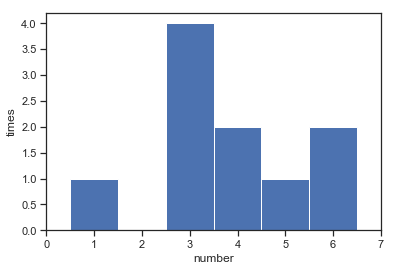

In [327]:
import random
list_10=[]
for i in range(10):
    list_10.append(random.randrange(1,7,1))
bins=np.arange(0, 8)-0.5
plt.hist(x=list_10, bins=bins)
plt.xlim([0,7])
plt.xlabel('number')
plt.ylabel('times')

plt.show()

Распределение дискретное, неравномерное, так как слишком мало данных

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

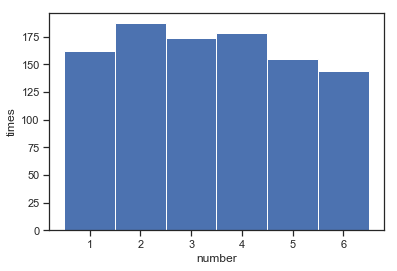

In [329]:
list_1000=[]
for i in range(1000):
    list_1000.append(random.randrange(1,7,1))
bins=np.arange(1, 8)-0.5
plt.hist(x=list_1000,bins=bins)
plt.xlabel('number')
plt.ylabel('times')
plt.show()

А здесь данных много поэтому график изменился и сразу видно, что это равномерное распределение.
Центральную предельную теорему мы можем применить считая не распределение разовых значений выпавших на кубике, а распределение суммы значений нескольких подбрасываний.
Например, двух подбрасываний:

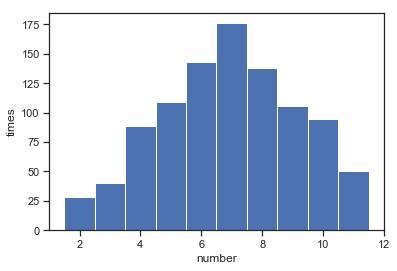

In [335]:
list_1000_2=[]
for i in range(1000):
    list_1000_2.append(random.randrange(1,7,1)+random.randrange(1,7,1))
bins=np.arange(2,13)-0.5
plt.hist(x=list_1000_2, bins=bins)
plt.xlabel('number')
plt.ylabel('times')
plt.show()

Распределение сумм значений, полученных от подбрасывания кубика по два раза, стремится к нормальному